<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Integración numérica 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.- Escribir en python una función  de nombre "riemann" que acepte como entrada los siguientes parámetros:<br>

- f : función
        función vectorizada de una variable
- a,b : números
            límites del intervalo de integración [a,b]
- N  : entero
        Nñumero de subintervalos de igual longitud en la partición [a,b]
- tipo : string
        Tipo de la sunma de Riemann a utilizarse :
            right : Suma de Riemann con los puntos de la derecha
            left : Suma de Riemann con los puntos  de la izquierda
            midpoint (default) : Suma de Riemann con los puntos intermedios
      


### Retorna
   
- float, aproximación de la integral mediante la suma de Riemann
- Ejemplo de llamada : 
   - f = lambda x: np.sin(x)
   - riemann(f,0,np.pi/2,100,'left')

### 2.- Escribir en python una función  de nombre "trapz" que acepte como entrada los siguientes parámetros:<br>

- f : función
        función vectorizada de una variable
- a,b : números
            límites del intervalo de integración [a,b]
- N  : entero
        Nñumero de subintervalos de igual longitud en la partición [a,b]


### Retorna
   
- float, aproximación de la integral mediante la regla del trapecio con N subintervalos de igual longitud.
- Ejemplo de llamada : 
   - f = lambda x: np.sin(x)
   - trapz(f,0,np.pi/2,100)

### función para dibujar la integral

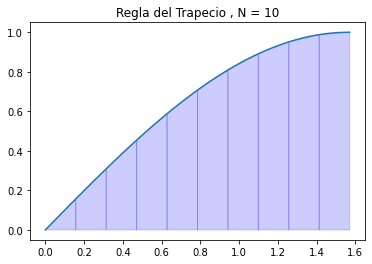

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Ejemplom dibujo de trapecios
f = lambda x : np.sin(x)
a = 0; b = np.pi/2; N = 10

# valores x e y para la regla del trapecio
x = np.linspace(a,b,N+1)
y = f(x)

# X e Y valores para dibujar  y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Regla del Trapecio , N = {}'.format(N))
plt.show()

### Regla de Simpson
Aproxima la integral $\displaystyle \int_a^b f(x)\, dx $ mediante la suma :
$$
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))$$
    
  Donde $ x_i = a + i*dx $ y $ dx = (b - a)/N $

In [0]:
def simps(f,a,b,N=50):
    '''Approxima la integral de f(x) mediante la regla de Simpson de 1/3.

    Parametros
    ----------
    f : función vectorizada de una variable
    a , b : n-umeros
        Intervalo de integracióm [a,b]
    N : (par) entero
        Número de subintervalos [a,b]

    Retorna
    -------
    float
        Aproximación de la integral de f(x) desde a a b utiliando
        la regla de Simpson con N subintervalos de igual longitud

    Ejemplos
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N debe ser un entero par.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [0]:
simps(lambda x : 3*x**2,0,1,10)

1.0

### 3.- Aproxime las siguientes integrales utilizando las reglas de Riemann del punto medio, trapezoidal y Simnpson con los valores indicados de n, escribir los resultados en una tabla para poder comparar los resultados.

<img src="https://drive.google.com/uc?id=1t9YACQAeJLjC1-xZ8FUoaNunymgUBCsZ" alt="Lamp" width="3420" height="220">


### 4.- Un auto completa una vuelta a un circuito de carreras en 84 seg. La velocidad del auto cada 6 seg. se obtuvo mediante una radar y se da desde el principio de la vuelta en pies/seg, de acuerdo a la siguiente tabla:

<img src="https://drive.google.com/uc?id=13t0TaoiOpEvi7cw-umjro-0wMewEYfAN" alt="Lamp" width="620" height="120">

### ¿Cuál es la longitud de la pista?

In [0]:
xi = np.array([0,6,12,18,24,30,36,42,48,54,60,66,72,78,84])
yi = np.array([124,134,148,156,147,133,121,109,99,85,78,89,104,116,123])

In [0]:
yi[1:3]

array([134, 148])

In [0]:
def trapz2(x,fx):
    print(x)
    print(fx) 
    y_right = fx[1:] # right endpoints
    y_left = fx[:-1] # left endpoints
    N = len(x)-1
    dx = (x[-1] - x[0])/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [0]:
trapz2(xi,yi)

[ 0  6 12 18 24 30 36 42 48 54 60 66 72 78 84]
[124 134 148 156 147 133 121 109  99  85  78  89 104 116 123]


9855.0

In [0]:
def trapz3(x,fx):
   
   
    N = len(x)-1
    dx = (x[-1] - x[0])/N
    suma = (fx[0]+fx[-1])/2
    for i in range(1,N):
      suma = suma + fx[i]
    suma = suma*dx
    return suma

In [0]:
trapz3(xi,yi)

9855.0

In [0]:
def simps(x,fx):
    N = len(x)-1
    dx = (x[-1] - x[0])/N
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    S = dx/3 * np.sum(fx[0:-1:2] + 4*fx[1::2] + f[2::2])
    return S

In [0]:
trapz3(xi,yi)

9855.0

### 5  Una viga de 11 m está sujeta a una carga, y la fuerza cortante sigue la ecuación $V(x) = 5 + 0.25x^2 $ donde V es la fuerza cortante y x es la distancia a lo largo de la viga. Se sabe que $V= dM/dx$ y M es el momento flexionante. La integración conduce a la relación: (ch 21.21)
$$
\displaystyle M = M_0 + \int_0^x V dx
$$

### Si $M_0$ es cero y x = 11, calcule M con el empleo de a) integración analítica, tí) aplicación múltiple de la regla del trapecio y c) aplicación múltiple de las reglas de Simpson. Para los incisos b) y c) use incrementos de 1 m.

### 6. k-13.- Una masa $m$ está unida a un resorte  de longitud libre $b$ y constante $k$. El coeficiente de fricción entre la masa y la barra horizontal es $\mu$. La aceleración de la masa se puede expresar como $x'' = -f(x)$
<img src="https://drive.google.com/uc?id=1qwH142-JOYhV_NQWd4o_gjaYSIvVOvZU" alt="Lamp" width="220" height="120">

### $f(x) $ se puede expresar como:

$$
f(x) = \mu g + \frac{k}{m}(\mu b+x) \left ( 1- \frac{b}{\sqrt {b^2+x^2}} \right )$$

### Si la masa se libera desde el reposo en $x=b$, su velocidad está dada por:
$$\displaystyle
v_0 = \sqrt {2\int_0^bf(x)dx}$$

### Calcular $v_0$ mediante integración numérica utilizando los datos $m=0.8\, kg,\,\, b=0.4\,\,m, \,\,\mu = 0.3,\,\, k= 80\,N/m\,\,y\,\,g=9.81\,m/s^2 $

![texto alternativo](https://)